# Comparative Evaluation of Classification Algorithms for Optimal Model Selection

## Problem Statement
In the era of data-driven decision making, selecting the most suitable machine learning algorithm is critical for building accurate and reliable predictive models. This project focuses on the comparative evaluation of multiple classification algorithms—including Logistic Regression, Decision Tree, K-Nearest Neighbors, Support Vector Machine (SVM), AdaBoost, Gradient Boosting, and Random Forest—to identify the optimal model for a given classification task.

## Objective
The objective is to analyze and compare these models based on key performance metrics such as accuracy, precision, and generalization capability across training and testing datasets. By systematically assessing each model's strengths and limitations, the project aims to determine the most effective algorithm that balances performance and reliability, ultimately guiding the selection of a robust model suitable for deployment in real-world scenarios.

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Reading the data

In [2]:
data=pd.read_csv("train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Information about data
- This airline passenger satisfaction dataset contains survey responses and flight details from travelers. It includes demographic info (like gender and age), flight features (class, distance, delays), and service ratings (e.g., food, seat comfort, wifi). The target variable is Satisfaction, labeled as either satisfied or neutral/dissatisfied. The goal is to build a model to predict passenger satisfaction based on these features.

- Feature	Type	Description
- Gender	Categorical	Male or Female
- Customer Type	Categorical	Loyal customer or Disloyal customer
- Age	Numerical	Passenger's age
- Type of Travel	Categorical	Business Travel or Personal Travel
- Class	Categorical	Travel class (Eco, Eco Plus, Business)
- Flight Distance	Numerical	Distance of the flight in miles
- Inflight wifi service	Ordinal (0–5)	0: Not available, 1–5: Satisfaction level
- Departure/Arrival time convenient	Ordinal (1–5)	Satisfaction with schedule
- Ease of Online booking	Ordinal (1–5)	Satisfaction with online booking
- Gate location	Ordinal (1–5)	Satisfaction with gate location
- Food and drink	Ordinal (1–5)	Satisfaction with food
- Online boarding	Ordinal (1–5)	Satisfaction with boarding process
- Seat comfort	Ordinal (1–5)	Satisfaction with seat comfort
- Inflight entertainment	Ordinal (1–5)	Satisfaction with onboard entertainment
- On-board service	Ordinal (1–5)	General onboard service satisfaction
- Leg room service	Ordinal (1–5)	Satisfaction with legroom
- Baggage handling	Ordinal (1–5)	Satisfaction with baggage process
- Check-in service	Ordinal (1–5)	Satisfaction with check-in
- Inflight service	Ordinal (1–5)	General inflight service satisfaction
- Cleanliness	Ordinal (1–5)	Satisfaction with cleanliness
- Departure Delay in Minutes	Numerical	Minutes late at departure
- Arrival Delay in Minutes	Numerical	Minutes late at arrival
- Satisfaction (Target)	Categorical	Satisfaction or Neutral or Dissatisfaction

### Cheking the shape of the data

In [3]:
data.shape

(103904, 25)

### Drop unwanted features

In [4]:
data=data.drop("Unnamed: 0", axis=1)

### Information about data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

### Check duplicates

In [6]:
data.duplicated().sum()

0

### Check null vaues

In [7]:
data.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Dropping null values

In [8]:
data.dropna(inplace=True)

### Check null values again

In [9]:
data.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Check unique values

In [10]:
data.nunique()

id                                   103594
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              445
Arrival Delay in Minutes        

### Statistical summary of the data

In [11]:
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Correlation

In [12]:
corr=data.corr(numeric_only=True)
corr

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022929,0.095184,-0.021338,-0.001714,0.014119,-0.000427,0.001254,0.055394,0.053091,0.002592,0.055255,0.044459,0.075134,0.079346,0.079468,0.025313,-0.019321,-0.037254
Age,0.022929,1.000000,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147
Flight Distance,0.095184,0.099838,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426
Inflight wifi service,-0.021338,0.017470,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095
Departure/Arrival time convenient,-0.001714,0.038038,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864
Ease of Online booking,0.014119,0.024461,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984
Gate location,-0.000427,-0.001558,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143
Food and drink,0.001254,0.022920,0.056957,0.134603,0.005189,0.031940,-0.001170,1.000000,0.234492,0.574561,0.622374,0.058999,0.032415,0.034811,0.087055,0.034077,0.657648,-0.029983,-0.032524
Online boarding,0.055394,0.208681,0.215191,0.457002,0.069990,0.404093,0.001451,0.234492,1.000000,0.420067,0.285194,0.155345,0.123780,0.083299,0.204208,0.074390,0.331498,-0.018515,-0.021949
Seat comfort,0.053091,0.160302,0.157517,0.122617,0.011416,0.030021,0.003383,0.574561,0.420067,1.000000,0.610614,0.132030,0.105447,0.074553,0.191545,0.069193,0.678478,-0.027323,-0.029900


### Univartiate Analysis

### Numerical

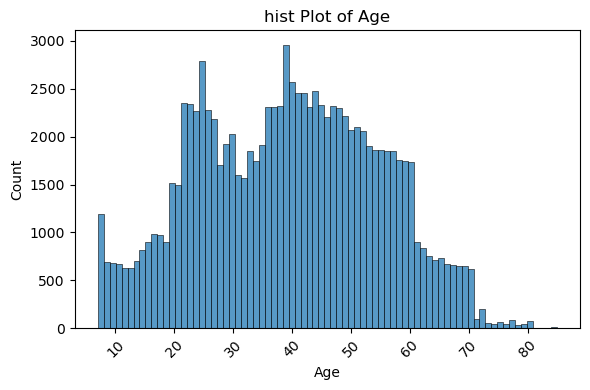

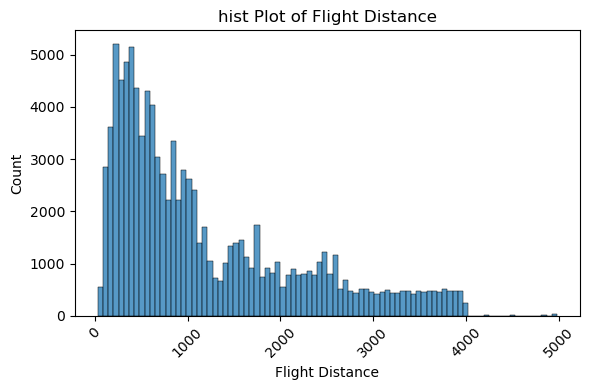

In [13]:
hist=["Age","Flight Distance"]
for i in hist:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[i])
    plt.title(f'hist Plot of {i}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Categorical 

In [14]:
bar=["Gender","Customer Type","Type of Travel","Class","Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
     "Gate location","Food and drink",
    "Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service","Baggage handling",
     "Checkin service","Inflight service","Cleanliness","satisfaction"]

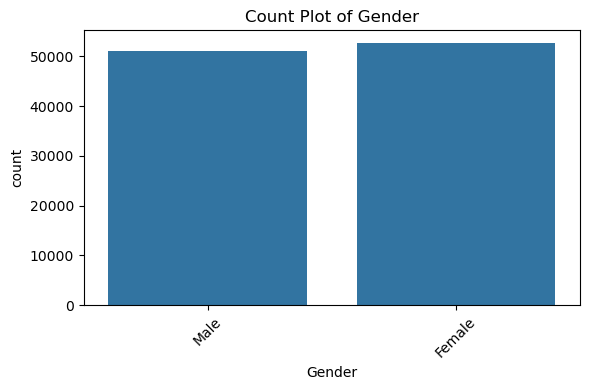

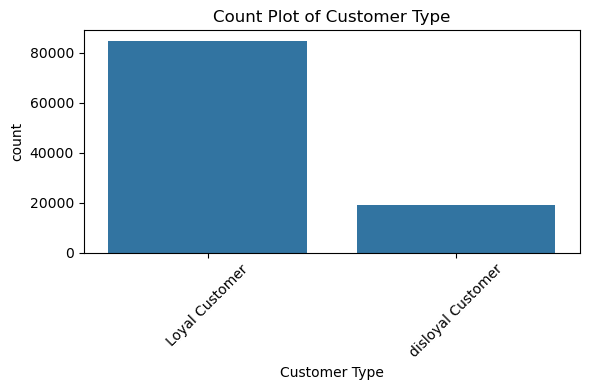

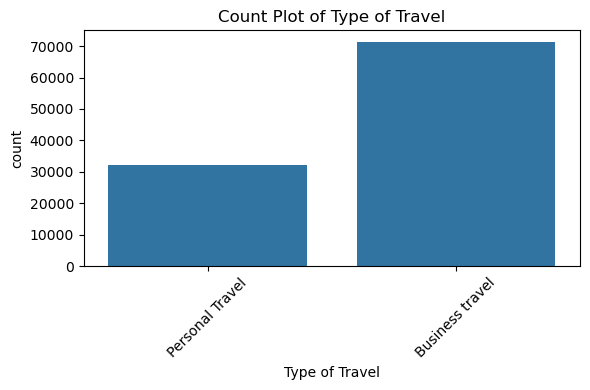

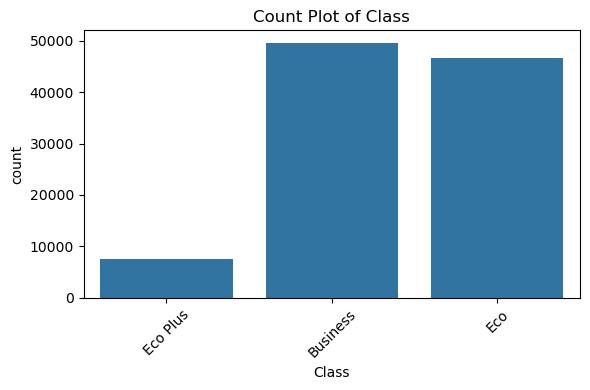

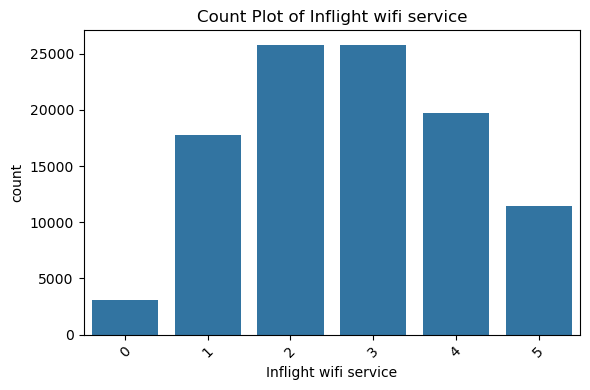

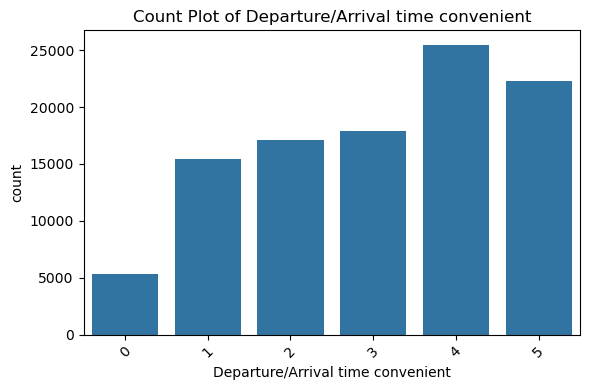

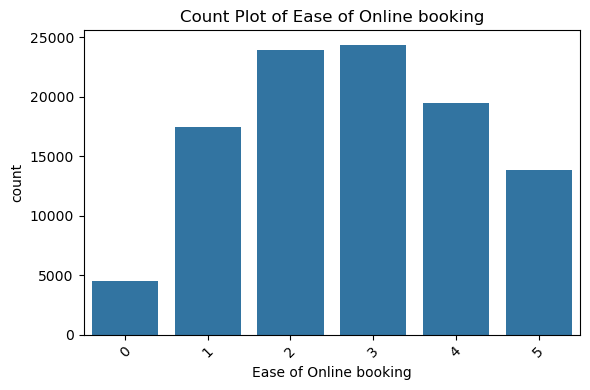

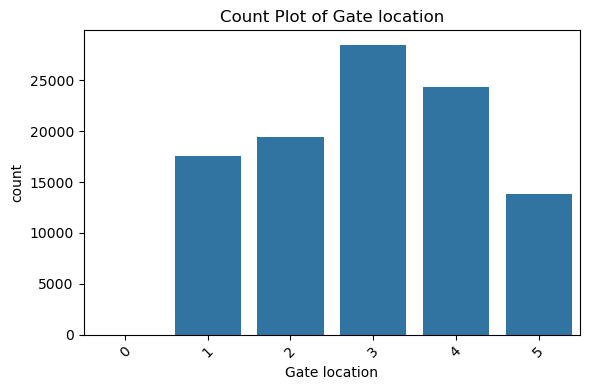

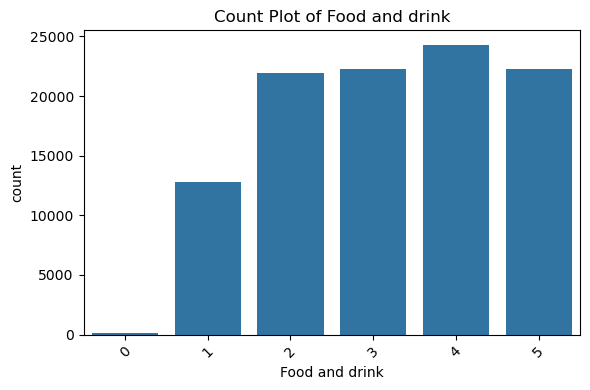

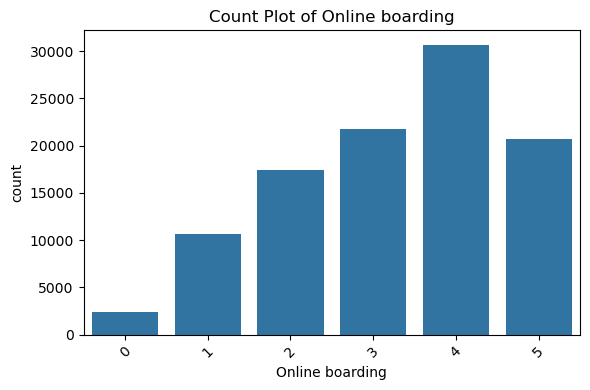

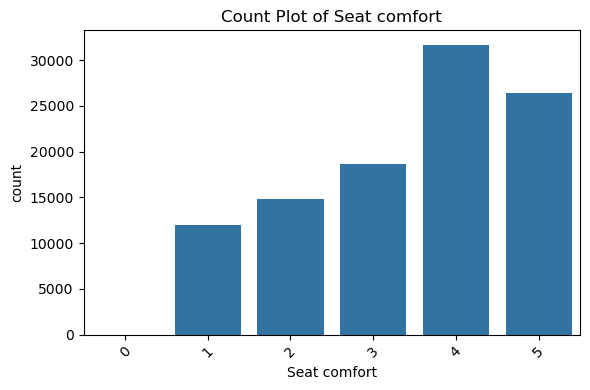

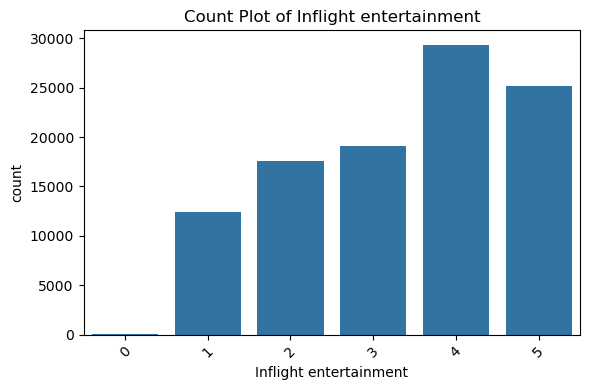

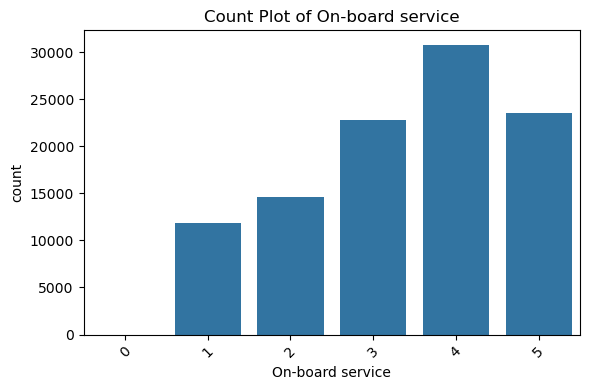

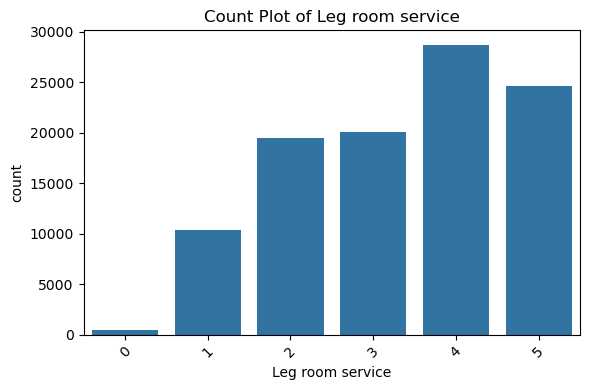

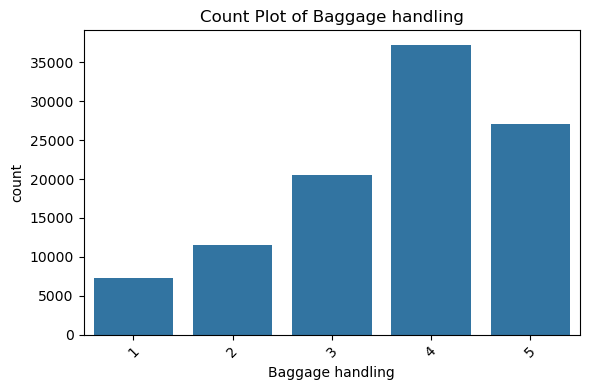

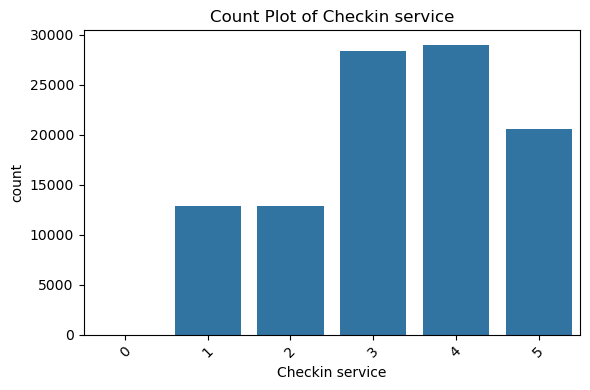

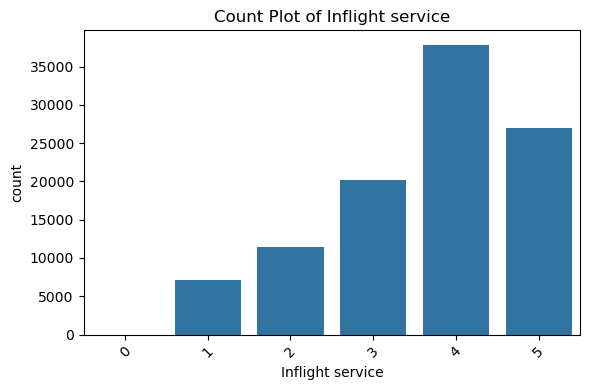

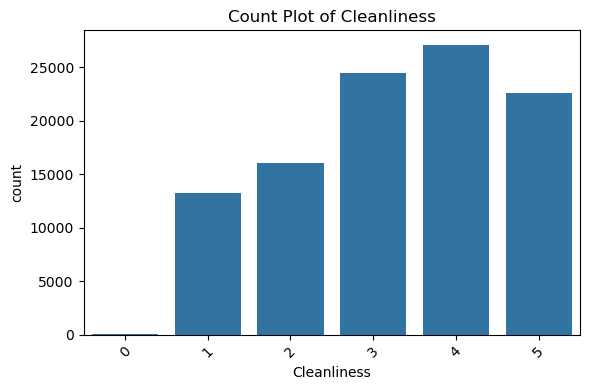

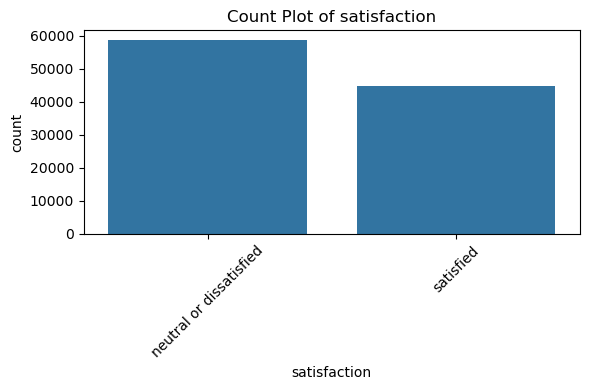

In [15]:
for i in bar:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[i])
    plt.title(f'Count Plot of {i}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Multivariate Analysis

<Axes: >

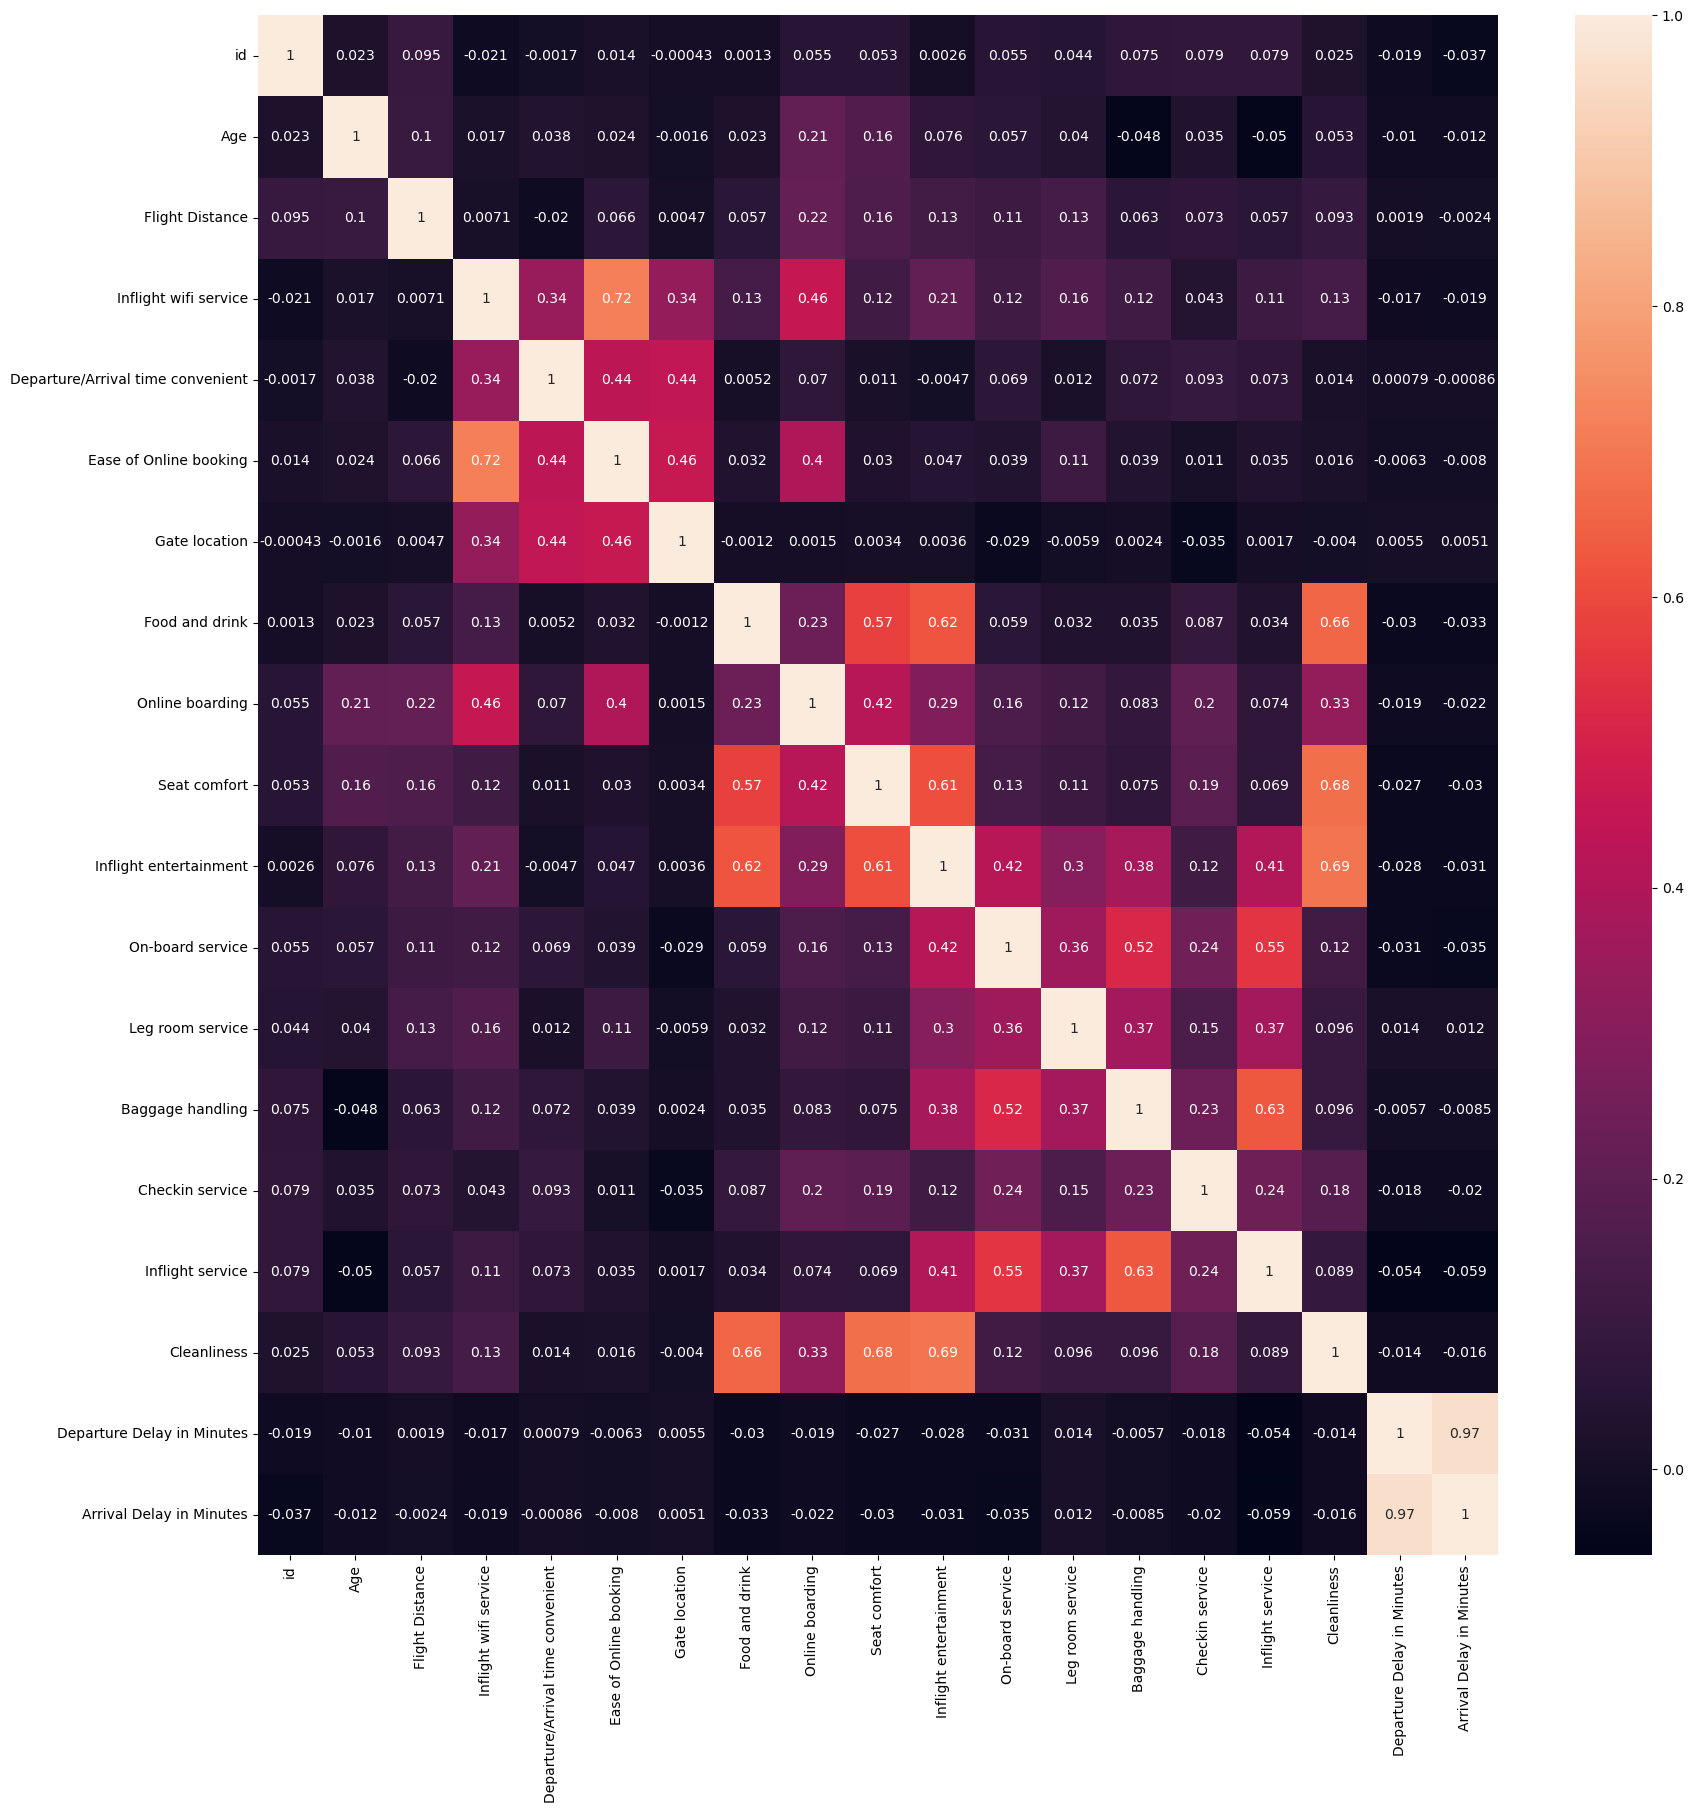

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

### Model building

In [17]:
data["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [18]:
data["satisfaction"]=data["satisfaction"].replace({"neutral or dissatisfied":0,"satisfied":1})

C:\Users\Manisha\AppData\Local\Temp\ipykernel_712\4088492871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["satisfaction"]=data["satisfaction"].replace({"neutral or dissatisfied":0,"satisfied":1})


### One hot encoding

In [19]:
data=pd.get_dummies(data, drop_first=True)

In [ ]:
data.shape

### Splitting into independent and dependent

In [20]:
x=data.drop("satisfaction", axis=1)
y=data["satisfaction"]

In [21]:
x.shape

(103594, 24)

In [22]:
y.shape

(103594,)

In [23]:
y.value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

### Splitting data into training and testing

In [24]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

### Feature scaling 

In [25]:
scaled=StandardScaler()
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

### Instantiation

In [26]:
log=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()

### Storing accuracy and precision

In [27]:
test_accuracy=[]
test_precision=[]
training_accuracy=[]
training_precision=[]

### Logistic Regression

In [28]:
log.fit(x_train, y_train)

LogisticRegression()

In [29]:
log_predtrain=log.predict(x_train)
log_predtest=log.predict(x_test)

In [30]:
print("training accuracy - ",accuracy_score(y_train,log_predtrain))
print("testing accuracy - ",accuracy_score(y_test,log_predtest))

training accuracy -  0.8767058823529412
testing accuracy -  0.8751870264008881


In [31]:
print("training precision - ",precision_score(y_train,log_predtrain))
print("testing precision - ",precision_score(y_test,log_predtest))

training precision -  0.8710705490366507
testing precision -  0.8761904761904762


In [32]:
test_accuracy.append(accuracy_score(y_test,log_predtest))
test_precision.append(precision_score(y_test,log_predtest, pos_label=1))

In [33]:
training_accuracy.append(accuracy_score(y_train,log_predtrain))
training_precision.append(precision_score(y_train,log_predtrain, pos_label=1))

In [34]:
print("confusion matrix for training")
print(confusion_matrix(y_train,log_predtrain))
print("confusion matrix for testing")
print(confusion_matrix(y_test,log_predtest))

confusion matrix for training
[[42592  4450]
 [ 5768 30065]]
confusion matrix for testing
[[10589  1066]
 [ 1520  7544]]


In [35]:
print("classification report for training")
print(classification_report(y_train,log_predtrain))
print("classification report for testing")
print(classification_report(y_test,log_predtest))

classification report for training
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     47042
           1       0.87      0.84      0.85     35833

    accuracy                           0.88     82875
   macro avg       0.88      0.87      0.87     82875
weighted avg       0.88      0.88      0.88     82875

classification report for testing
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11655
           1       0.88      0.83      0.85      9064

    accuracy                           0.88     20719
   macro avg       0.88      0.87      0.87     20719
weighted avg       0.88      0.88      0.87     20719



#### Insights
- Logistic Regression achieved a strong performance with 87.51% accuracy and 87.61% precision on the testing set, indicating reliable classification capability. The close values suggest the model maintains a good balance between correctly identifying and precisely classifying instances.
- The confusion matrices show that both training and testing sets have a relatively low number of false positives and false negatives. This indicates that the model generalizes well, maintaining a good balance between sensitivity and specificity.
- The model shows consistent performance on both training and testing sets, with an overall 88% accuracy and balanced precision and recall across both classes. High F1-scores indicate the model is effectively handling both positive and negative predictions, without overfitting.

### KNN

In [36]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
knn_predtrain=knn.predict(x_train)
knn_predtest=knn.predict(x_test)

In [38]:
print("training accuracy - ",accuracy_score(y_train,knn_predtrain))
print("testing accuracy - ",accuracy_score(y_test,knn_predtest))

training accuracy -  0.947076923076923
testing accuracy -  0.9259134128094986


In [39]:
print("training precision - ",precision_score(y_train,knn_predtrain))
print("testing precision - ",precision_score(y_test,knn_predtest))

training precision -  0.9660333738403628
testing precision -  0.9494925373134329


In [40]:
test_accuracy.append(accuracy_score(y_test,knn_predtest))
test_precision.append(precision_score(y_test,knn_predtest, pos_label=1))

In [41]:
training_accuracy.append(accuracy_score(y_train,knn_predtrain))
training_precision.append(precision_score(y_train,knn_predtrain, pos_label=1))

In [42]:
print("confusion matrix for training")
print(confusion_matrix(y_train,knn_predtrain))
print("confusion matrix for testing")
print(confusion_matrix(y_test,knn_predtest))

confusion matrix for training
[[45896  1146]
 [ 3240 32593]]
confusion matrix for testing
[[11232   423]
 [ 1112  7952]]


In [43]:
print("classification report for training")
print(classification_report(y_train,knn_predtrain))
print("classification report for testing")
print(classification_report(y_test,knn_predtest))

classification report for training
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     47042
           1       0.97      0.91      0.94     35833

    accuracy                           0.95     82875
   macro avg       0.95      0.94      0.95     82875
weighted avg       0.95      0.95      0.95     82875

classification report for testing
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11655
           1       0.95      0.88      0.91      9064

    accuracy                           0.93     20719
   macro avg       0.93      0.92      0.92     20719
weighted avg       0.93      0.93      0.93     20719



#### Insights 
- The KNN model performs exceptionally well with 94.71% training accuracy and 92.59% testing accuracy, indicating strong generalization. High precision scores on both sets show the model makes very few false positive predictions.
- The confusion matrices for KNN show a high number of true positives and true negatives, indicating effective classification. The relatively low false positive and false negative counts confirm the model's strong predictive reliability on both training and testing data.
- The KNN model maintains high precision and recall across both classes, with a balanced F1-score near 0.93 on the test set, showing solid generalization. Its strong performance on both 0 and 1 classes confirms robustness in handling class distribution.

### SVM

In [44]:
svc.fit(x_train, y_train)

SVC()

In [45]:
svc_predtrain=svc.predict(x_train)
svc_predtest=svc.predict(x_test)

In [46]:
print("training accuracy - ",accuracy_score(y_train,svc_predtrain))
print("testing accuracy - ",accuracy_score(y_test,svc_predtest))

training accuracy -  0.9593966817496229
testing accuracy -  0.9556445774409962


In [47]:
print("training precision - ",precision_score(y_train,svc_predtrain))
print("testing precision - ",precision_score(y_test,svc_predtest))

training precision -  0.965370943699117
testing precision -  0.9623112725621523


In [48]:
test_accuracy.append(accuracy_score(y_test,svc_predtest))
test_precision.append(precision_score(y_test,svc_predtest, pos_label=1))

In [49]:
training_accuracy.append(accuracy_score(y_train,svc_predtrain))
training_precision.append(precision_score(y_train,svc_predtrain, pos_label=1))

In [113]:
print("confusion matrix for training")
print(confusion_matrix(y_train,svc_predtrain))
print("confusion matrix for testing")
print(confusion_matrix(y_test,svc_predtest))

confusion matrix for training
[[45834  1208]
 [ 2157 33676]]
confusion matrix for testing
[[11323   332]
 [  587  8477]]


In [114]:
print("classification report for training")
print(classification_report(y_train,svc_predtrain))
print("classification report for testing")
print(classification_report(y_test,svc_predtest))

classification report for training
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     47042
           1       0.97      0.94      0.95     35833

    accuracy                           0.96     82875
   macro avg       0.96      0.96      0.96     82875
weighted avg       0.96      0.96      0.96     82875

classification report for testing
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11655
           1       0.96      0.94      0.95      9064

    accuracy                           0.96     20719
   macro avg       0.96      0.95      0.95     20719
weighted avg       0.96      0.96      0.96     20719



#### Insights
- The SVM model delivers excellent performance with 95.94% training accuracy and 95.56% testing accuracy, indicating minimal overfitting. High precision scores reflect the model's strong ability to correctly classify positive instances with low false positives.
- The SVM confusion matrices show very low false positives and false negatives, especially on the testing set, indicating high classification reliability. The strong true positive and true negative counts confirm the model's excellent balance between sensitivity and specificity.
- The SVM model demonstrates consistently high precision, recall, and F1-scores for both training and testing sets, all around 0.95–0.96, showcasing its robust and balanced performance. The near-identical metrics across sets confirm excellent generalization without overfitting.

### Tree Algorithms

In [52]:
var=data.drop("satisfaction", axis=1)
tar=data["satisfaction"]

In [53]:
var.shape

(103594, 24)

In [54]:
tar.shape

(103594,)

In [55]:
tar.value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

In [56]:
var_train, var_test, tar_train, tar_test=train_test_split(var, tar, test_size=0.2, random_state=42)

In [57]:
dt=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gbdt=GradientBoostingClassifier()

### Decision tree

In [58]:
dt.fit(var_train, tar_train)

DecisionTreeClassifier(max_depth=5)

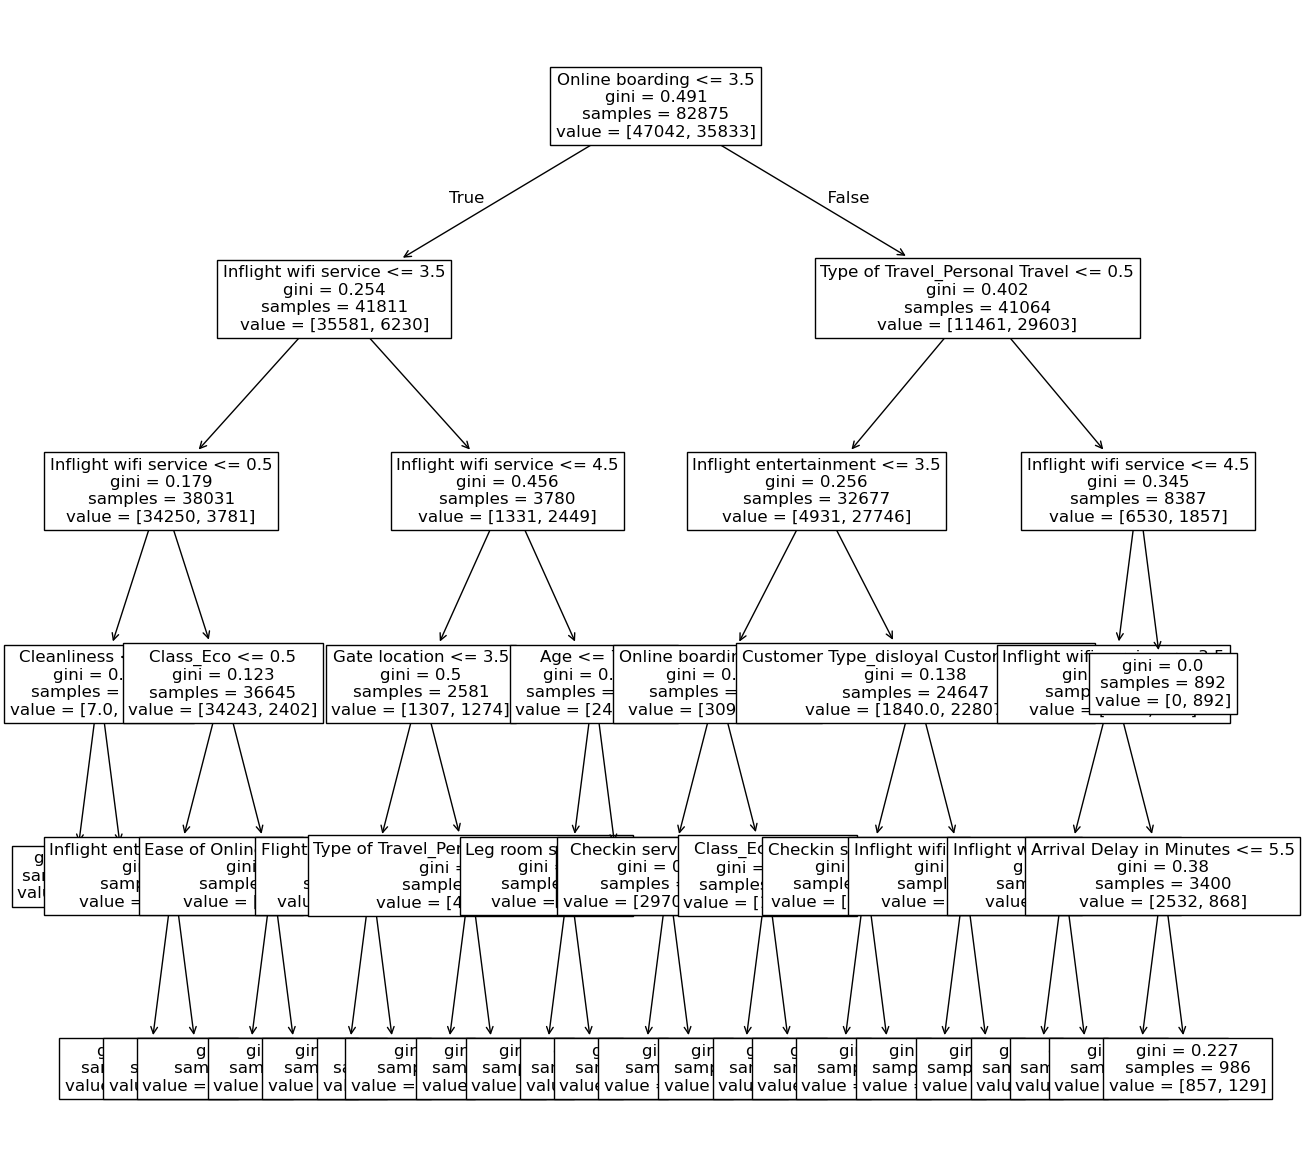

In [59]:
plt.figure(figsize=(15,15))
plot_tree(dt, max_depth=5,feature_names=x.columns, fontsize=12)
plt.show()

In [60]:
dt_predtrain=dt.predict(var_train)
dt_predtest=dt.predict(var_test)

In [61]:
print("training accuracy - ",accuracy_score(tar_train,dt_predtrain))
print("testing accuracy - ",accuracy_score(tar_test,dt_predtest))

training accuracy -  0.9061116138763198
testing accuracy -  0.9093102948984024


In [62]:
print("training precision - ",precision_score(tar_train,dt_predtrain))
print("testing precision - ",precision_score(tar_test,dt_predtest))

training precision -  0.9065035937862277
testing precision -  0.9109001486903808


In [63]:
test_accuracy.append(accuracy_score(tar_test,dt_predtest))
test_precision.append(precision_score(tar_test,dt_predtest, pos_label=1))

In [64]:
training_accuracy.append(accuracy_score(y_train,dt_predtrain))
training_precision.append(precision_score(y_train,dt_predtrain, pos_label=1))

#### Insights
- The Decision Tree model delivers solid performance with 90.61% training accuracy and 90.93% testing accuracy, suggesting good generalization with minimal overfitting.
High precision scores (90.65% train, 91.09% test) indicate the model reliably classifies positive instances with few false positives.
The consistency in accuracy and precision across datasets shows the model is balanced, stable, and performs well on unseen data.

### Random Forest

In [65]:
rf.fit(var_train, tar_train)

RandomForestClassifier()

In [66]:
rf_predtrain=rf.predict(var_train)
rf_predtest=rf.predict(var_test)

In [67]:
print("training accuracy - ",accuracy_score(tar_train,rf_predtrain))
print("testing accuracy - ",accuracy_score(tar_test,rf_predtest))

training accuracy -  1.0
testing accuracy -  0.9636565471306531


In [68]:
print("training precision - ",precision_score(tar_train,rf_predtrain))
print("testing precision - ",precision_score(tar_test,rf_predtest))

training precision -  1.0
testing precision -  0.9755120723194873


In [69]:
test_accuracy.append(accuracy_score(tar_test,rf_predtest))
test_precision.append(precision_score(tar_test,rf_predtest, pos_label=1))

In [70]:
training_accuracy.append(accuracy_score(y_train,rf_predtrain))
training_precision.append(precision_score(y_train,rf_predtrain, pos_label=1))

### Insights
- The Random Forest model achieves perfect training accuracy and precision, suggesting it fits the training data completely.
With a testing accuracy of 96.37% and precision of 97.55%, it generalizes very well, though slight overfitting is possible.
Despite that, the high testing metrics confirm the model is powerful and highly effective for this classification task.

### Ada boost

In [71]:
ada.fit(var_train, tar_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [72]:
ada_predtrain=ada.predict(var_train)
ada_predtest=ada.predict(var_test)

In [73]:
print("training accuracy - ",accuracy_score(tar_train,ada_predtrain))
print("testing accuracy - ",accuracy_score(tar_test,ada_predtest))

training accuracy -  0.9276742081447964
testing accuracy -  0.9294367488778416


In [74]:
print("training precision - ",precision_score(tar_train,ada_predtrain))
print("testing precision - ",precision_score(tar_test,ada_predtest))

training precision -  0.9208010153715978
testing precision -  0.9261210762331838


In [75]:
test_accuracy.append(accuracy_score(tar_test,ada_predtest))
test_precision.append(precision_score(tar_test,ada_predtest, pos_label=1))

In [76]:
training_accuracy.append(accuracy_score(y_train,ada_predtrain))
training_precision.append(precision_score(y_train,ada_predtrain, pos_label=1))

### Insights
- The AdaBoost model shows strong and consistent performance with 92.77% training accuracy and 92.94% testing accuracy, indicating solid generalization.
High precision on both sets (92.08% train, 92.61% test) reflects the model's reliability in minimizing false positives.
Balanced accuracy and precision suggest the model effectively captures key patterns without overfitting.

### Gradient boosting classifier

In [77]:
gbdt.fit(var_train, tar_train)

GradientBoostingClassifier()

In [78]:
gbdt_predtrain=gbdt.predict(var_train)
gbdt_predtest=gbdt.predict(var_test)

In [79]:
print("training accuracy - ",accuracy_score(tar_train,gbdt_predtrain))
print("testing accuracy - ",accuracy_score(tar_test,gbdt_predtest))

training accuracy -  0.9436259426847662
testing accuracy -  0.9443023311935904


In [80]:
print("training precision - ",precision_score(tar_train,gbdt_predtrain))
print("testing precision - ",precision_score(tar_test,gbdt_predtest))

training precision -  0.9458577765059379
testing precision -  0.9503529947620132


In [81]:
test_accuracy.append(accuracy_score(tar_test,gbdt_predtest))
test_precision.append(precision_score(tar_test,gbdt_predtest, pos_label=1))

In [82]:
training_accuracy.append(accuracy_score(y_train,gbdt_predtrain))
training_precision.append(precision_score(y_train,gbdt_predtrain, pos_label=1))

### Insights
- The Gradient Boosting model demonstrates excellent performance with closely matched training and testing accuracy (~94.4%), indicating strong generalization.
High precision scores (94.59% train, 95.04% test) confirm the model’s effectiveness in minimizing false positives.
The tight alignment of all metrics suggests the model is well-tuned and robust across both training and unseen data.

### Creating Dataframe for accuracy and precision

In [83]:
dic={"training_accuracy":training_accuracy,"training_precision":training_precision,"test_accuracy":test_accuracy,"test_precision":test_precision}

In [84]:
performance=pd.DataFrame(dic, index=["log","knn","svc","dt","rf","ada","gbdt"])

#### Insights
- The SVM (SVC) model stands out with high and balanced training (95.94%) and testing (95.56%) accuracy and precision, showing excellent generalization.
- Gradient Boosting and Random Forest also perform strongly, with Gradient Boosting offering balanced results (~94.4%) and Random Forest delivering the highest testing precision (97.55%) despite slight overfitting (100% training accuracy).
- KNN shows high training precision (96.60%) but a notable drop in test accuracy (92.59%), indicating potential overfitting or sensitivity to data distribution.
- AdaBoost provides consistent and reliable results around ~92%, showing good trade-off between performance and complexity.
- Decision Tree performs decently but is outshined by ensemble methods in both accuracy and precision.
- Logistic Regression lags slightly behind others, making it less suitable if high precision and accuracy are critical in your classification task.

In [85]:
performance

,training_accuracy,training_precision,test_accuracy,test_precision
log,0.876706,0.871071,0.875187,0.876190
knn,0.947077,0.966033,0.925913,0.949493
svc,0.959397,0.965371,0.955645,0.962311
dt,0.906112,0.906504,0.909310,0.910900
rf,1.000000,1.000000,0.963657,0.975512
ada,0.927674,0.920801,0.929437,0.926121
gbdt,0.943626,0.945858,0.944302,0.950353


### Saving training model

In [108]:
import joblib
joblib.dump(rf, "rftraining_model.pkl")
print("model saved successfully")

model saved successfully


### Use test data to predict

In [91]:
test_df=pd.read_csv("test.csv")
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [92]:
test_df=test_df.drop(["Unnamed: 0"], axis=1)

In [93]:
test_df.shape

(25976, 24)

In [94]:
test_df.duplicated().sum()

0

In [95]:
test_df.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [96]:
test_df.dropna(inplace=True)

In [97]:
test_df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [98]:
test_df.nunique()

id                                   25893
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3279
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             311
Arrival Delay in Minutes               320
satisfactio

In [99]:
test_df["satisfaction"]=test_df["satisfaction"].replace({"neutral or dissatisfied":0,"satisfied":1})

C:\Users\Manisha\AppData\Local\Temp\ipykernel_712\1997410472.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["satisfaction"]=test_df["satisfaction"].replace({"neutral or dissatisfied":0,"satisfied":1})


In [101]:
test_df=pd.get_dummies(test_df, drop_first=True)

In [102]:
test_df.shape

(25893, 25)

In [103]:
test_df.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,19556,52,160,5,4,3,4,3,4,3,...,5,5,50,44.0,1,False,False,False,True,False
1,90035,36,2863,1,1,3,1,5,4,5,...,4,5,0,0.0,1,False,False,False,False,False
2,12360,20,192,2,0,2,4,2,2,2,...,2,2,0,0.0,0,True,True,False,True,False
3,77959,44,3377,0,0,0,2,3,4,4,...,1,4,0,6.0,1,True,False,False,False,False
4,36875,49,1182,2,3,4,3,4,1,2,...,2,4,0,20.0,1,False,False,False,True,False


In [109]:
input_test=test_df.drop("satisfaction", axis=1)
output_test=test_df["satisfaction"]

In [107]:
# input_train, input_test, target_train, target_test=train_test_split(input_test, output_test, test_size=0.2, random_state=42)

In [110]:
rf_loaded=joblib.load("rftraining_model.pkl")
y_real_pred=rf_loaded.predict(input_test)

In [111]:
accuracy = accuracy_score(output_test, y_real_pred)
precision = precision_score(output_test, y_real_pred)

In [112]:
print(accuracy)
print(precision)

0.963078824392693
0.9734376421359047


## Conclusion
- During the model evaluation phase, a range of classification algorithms were trained and assessed on their ability to generalize from the training data. The following summarizes their performance:

- Random Forest Classifier achieved 100% accuracy on the training set, highlighting its strong learning capacity.

- SVM (SVC) displayed excellent balance with 95.94% training accuracy, suggesting good generalization potential.

- Gradient Boosting yielded stable and consistent results around 94.4% on training, showing effective handling of both bias and variance.

- K-Nearest Neighbors (KNN) had 96.60% training precision, but a drop in test accuracy indicated possible overfitting.

- AdaBoost maintained consistent performance at around 92%, proving reliable across multiple runs.

- Decision Tree and Logistic Regression were outperformed by ensemble methods, offering lower precision and accuracy, making them less suitable for this task.

- Following training, all models were evaluated on unseen test data to determine real-world predictive effectiveness. The Random Forest Classifier stood out once again, achieving:

- 96.31% accuracy
- 97.34% precision

- These results confirm its exceptional generalization ability and high reliability, especially in minimizing false positives. The slight overfitting observed in training was well-managed, as shown by the high performance on test data. This balance between learning capacity and generalization makes Random Forest ideal for deployment in critical classification scenarios.

- Its ensemble nature allows it to effectively handle complex feature interactions and reduce variance, contributing to consistently high-quality predictions. Given its superior performance across both training and testing phases, Random Forest was confidently selected as the final model for deployment and further analysis.